# ROI detection on text images

## Goal
The goal of this task is to detect interested regions of interests (ROIs) in images (printed text or written text). The ROIs will be provided for annotation classification (annotated or non-annotated image).

## Approachs
Steps to finish the ROIs detection:
1. Load an image into memory
2. Perform Image processing, e.g., grayscale
3. Configure an OCR Engine (e.g., Tesseract)
4. Apply the OCR Engine on the image to obtain a list of detection
5. Run the ROIs algorithm to obtain a list of refined ROIs (bounding box location, x,y,width,height)
6. Plot the bounding box and save the boxes into a corresponding txt file.

Several classes are needed in this work:
- Utils.py
- OCREngine.py
- ImgProcessor.py
- Plot.py

## Package configuration
- Python3.6
- Tessearct 3.05, leptonica-1.74.4, instructions:
    - a. overall: https://lucacerone.net/2017/install-tesseract-3-0-5-in-ubuntu-16-04/
    - b. download the english language package, tesseract-ocr-3.02.eng.tar.gz, and put them into /usr/local/share/tessdata
        - https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#cube-data-files-for-version-304305
- pyTesseract 0.2.0
- Ubuntu 14.04
- Pillow, "conda install pillow" for python3.6
- cv3 for python3.6, conda install -c menpo opencv3


In [1]:
%load_ext autoreload
%autoreload 2

from lib.ImgProcessor import ImgProcessor
import matplotlib.pyplot as plt
import numpy as np


# 1. Define the image
root_dir = './sample/positive'
fname = '30.png'
f = '%s/%s' % (root_dir,fname)


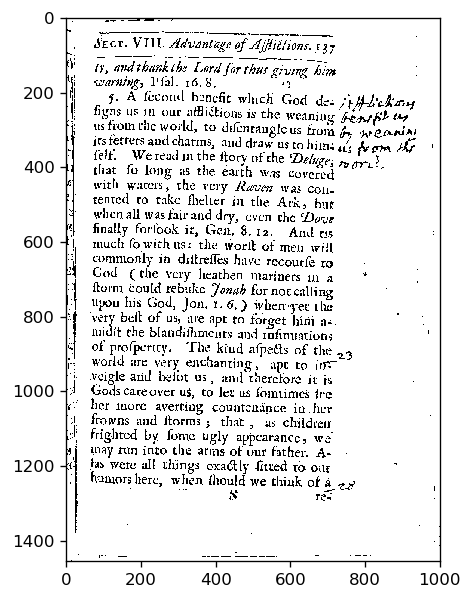

In [2]:
# 2. Load the image
imgProcessor = ImgProcessor()
img = imgProcessor.loadImage(inFilename=f)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

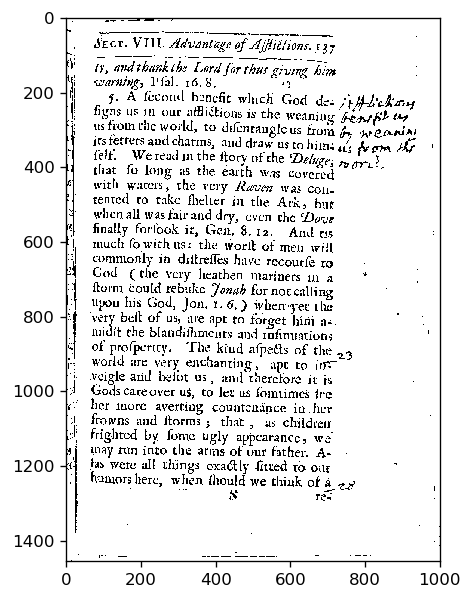

In [4]:
# 3. preprocess the image
img = imgProcessor.quickPreprocess(img)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

In [5]:
# ############################################
#
# 4. Load the tessearct engine
#
# ############################################

from lib.OCREngine import OCREngine

# define engine
ocr = OCREngine('tesseract')

# perform ocr
imgROIs, data_df = ocr.tess_image_to_data(img)

# check
print(imgROIs[10].toString())
print(data_df)


x:87	y:39	width:162	height:7	text:nan	confidence:-1	level:3	isAnnotation:False
     level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        1         1          0        0         0         0     0     0   
1        2         1          1        0         0         0   105     0   
2        3         1          1        1         0         0   105     0   
3        4         1          1        1         1         0   105     0   
4        5         1          1        1         1         1   105     0   
5        2         1          2        0         0         0   257    36   
6        3         1          2        1         0         0   257    36   
7        4         1          2        1         1         0   257    36   
8        5         1          2        1         1         1   257    36   
9        2         1          3        0         0         0    87    39   
10       3         1          3        1         0         0    87    39   
11       

In [ ]:
# ############################################
#
# 4.1 Perform  Classification algorithm to:
#
# (1) Merge boxes (reduce redundant boxes) into line level
# (2) Do the straightforward classification algorithm
#     to determine if a bounding box is annotated or not.
#     Update hte ImageROI model class isAnnotation=True/False attribute
#
# ############################################

# TODO By Emily <-- just return a list of ImageROI after your algorithm, 
# e.g., [ImageROI1, ImageROI2, etc]



x:105	y:0	width:146	height:14	text:nan	confidence:-1	level:4	isAnnotation:False
x:257	y:36	width:77	height:7	text:nan	confidence:-1	level:4	isAnnotation:False
x:87	y:39	width:162	height:7	text:nan	confidence:-1	level:4	isAnnotation:False
x:335	y:41	width:147	height:8	text:nan	confidence:-1	level:4	isAnnotation:False
x:21	y:48	width:699	height:53	text:nan	confidence:-1	level:4	isAnnotation:False
x:77	y:118	width:644	height:47	text:nan	confidence:-1	level:4	isAnnotation:False
x:76	y:158	width:524	height:37	text:nan	confidence:-1	level:4	isAnnotation:False
x:115	y:196	width:818	height:57	text:nan	confidence:-1	level:4	isAnnotation:False
x:74	y:235	width:841	height:56	text:nan	confidence:-1	level:4	isAnnotation:False
x:76	y:275	width:860	height:51	text:nan	confidence:-1	level:4	isAnnotation:False
x:73	y:314	width:864	height:59	text:nan	confidence:-1	level:4	isAnnotation:False
x:73	y:354	width:776	height:53	text:nan	confidence:-1	level:4	isAnnotation:False
x:74	y:393	width:642	height:42	tex

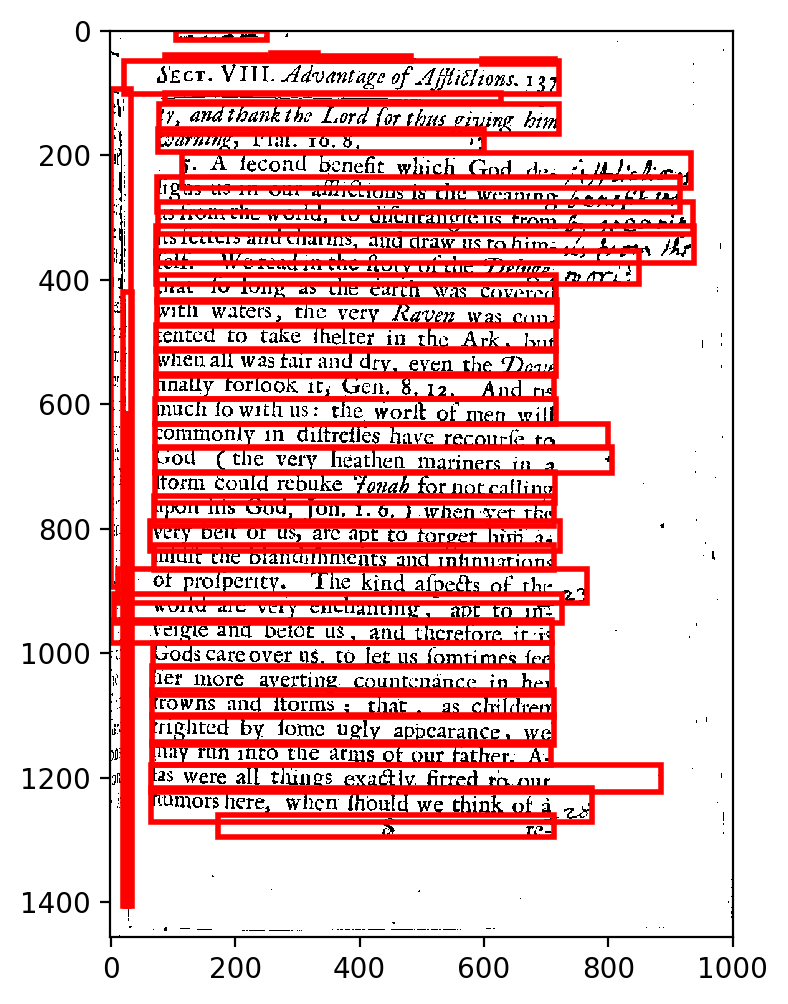

In [7]:
# ############################################
#
# 5. Plot the bounding boxes on the text image
#
# ############################################
from lib.utils.Utils import *
import pickle

# plot the rois and plot only certain information according to the set
roi_level_set = set([4])
plt_img(img, rois=imgROIs, roi_level_set=roi_level_set)

# save the plot
plt.savefig('./result/%s_boxes.png' %fname)

# save the bounding boxes to txt
save_rois(imgROIs,'./result/%s_imgROIs.txt' %fname)

# save the bounding boxes to pickle
with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
    pickle.dump(imgROIs,f)
